/tmp/ipykernel_50814/2752928042.py:26: RuntimeWarning: overflow encountered in exp
  F[k-1] = A*u[k+1] - 2*A*u[k] + A*u[k-1] + C*np.exp(u[k]) + 1-lambda_
/tmp/ipykernel_50814/2752928042.py:30: RuntimeWarning: overflow encountered in exp
  dF[k-1, k-1] = -2*A*u[k] + C*np.exp(u[k])  # Центр


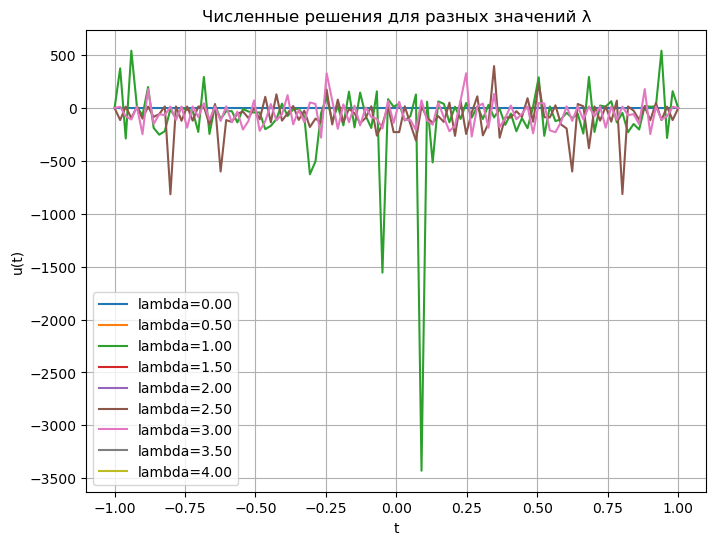

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def C_k(t, lamb):
    return lamb*t**2-1

def solve_nonlinear_bvp(N=100, lambda_max=4.0, delta_lambda=0.5, tol=1e-5, max_iter=100):
    a, b = -1, 1  # Границы области
    h = (b - a) / (N+1)  # Шаг сетки
    t = np.linspace(a, b, N+2)  # Включаем границы
    A = 1/h**2
    lambda_values = np.arange(0, lambda_max + delta_lambda, delta_lambda)
    
    solutions = {}  # Хранение решений

    for lambda_ in lambda_values:
        u = np.zeros(N+2) # Начальное приближение

        for _ in range(max_iter):
            F = np.zeros(N)
            dF = np.zeros((N, N))
            
            # Формируем систему уравнений для внутренних узлов
            for k in range(1, N+1):
                C = C_k(t[k], lambda_)
                F[k-1] = A*u[k+1] - 2*A*u[k] + A*u[k-1] + C*np.exp(u[k]) + 1-lambda_
                
                if k > 1:
                    dF[k-1, k-2] = A  # Левый сосед
                dF[k-1, k-1] = -2*A*u[k] + C*np.exp(u[k])  # Центр
                if k < N:
                    dF[k-1, k] = A  # Правый сосед
            
            # Решаем систему методом Ньютона
            try:
                v = np.linalg.solve(dF, -F)
            except np.linalg.LinAlgError:
                print(f"Ошибка: матрица Якоби сингулярна для lambda={lambda_}")
                break

            u[1:N+1] += v  # Обновляем только внутренние точки
            
            if np.linalg.norm(v, np.inf) < tol:
                break
        
        solutions[lambda_] = u.copy()
    
    return t, solutions

# Решение задачи
t, solutions = solve_nonlinear_bvp()

# График решений
plt.figure(figsize=(8, 6))
for lambda_, u in solutions.items():
    plt.plot(t, u, label=f'lambda={lambda_:.2f}')
    
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Численные решения для разных значений λ')
plt.legend()
plt.grid()
plt.show()


Col iterations: 0
Col iterations: 2
Col iterations: 3
Col iterations: 3
Col iterations: 3
Col iterations: 3
Col iterations: 3
Col iterations: 3
Col iterations: 3


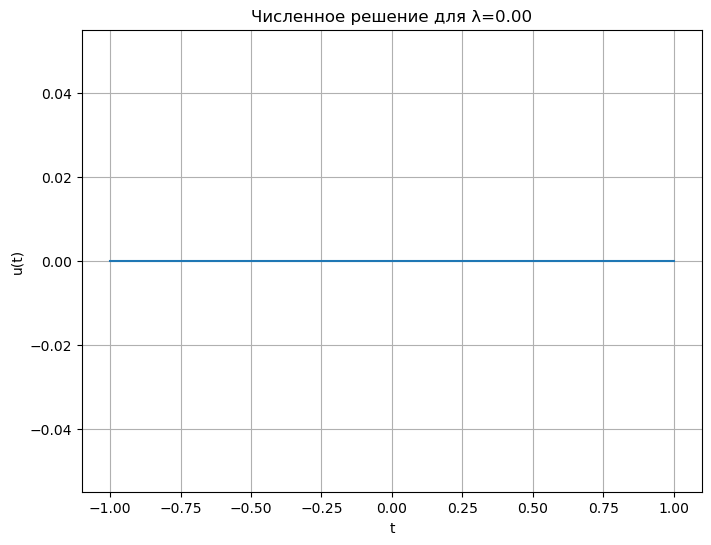

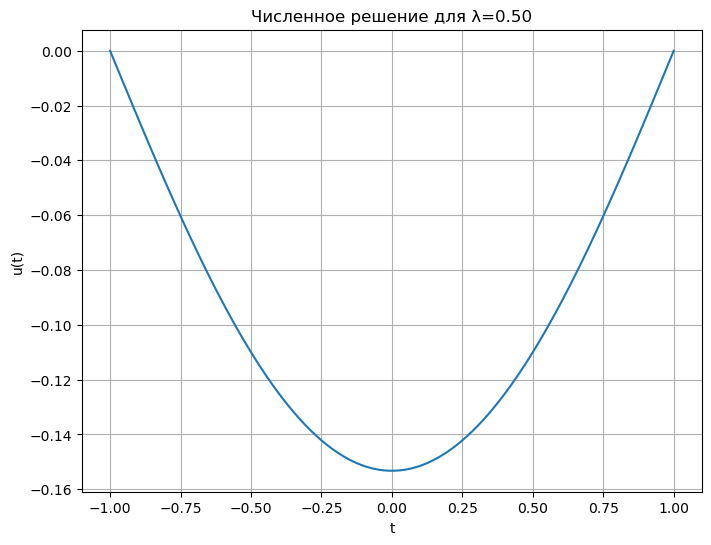

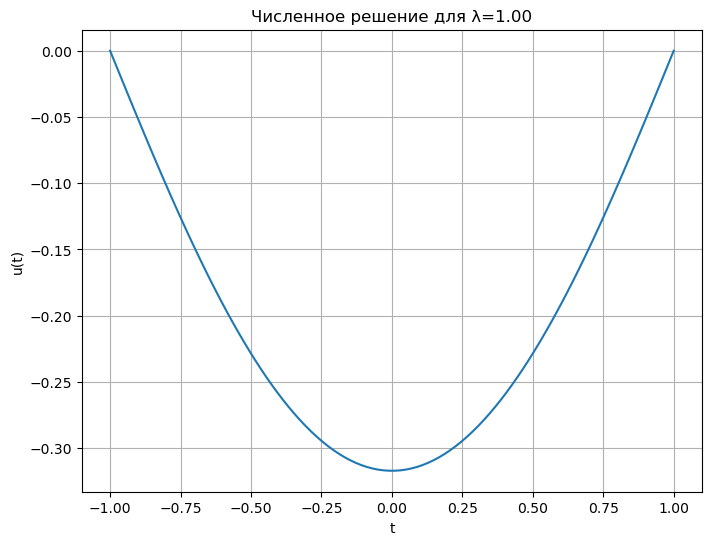

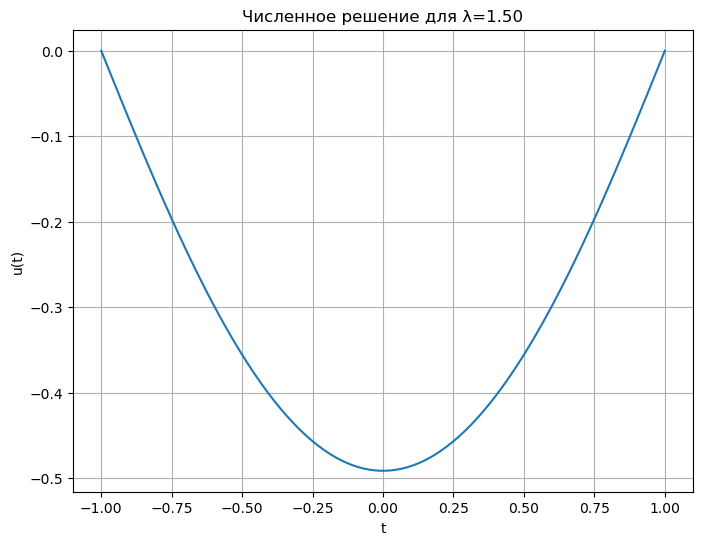

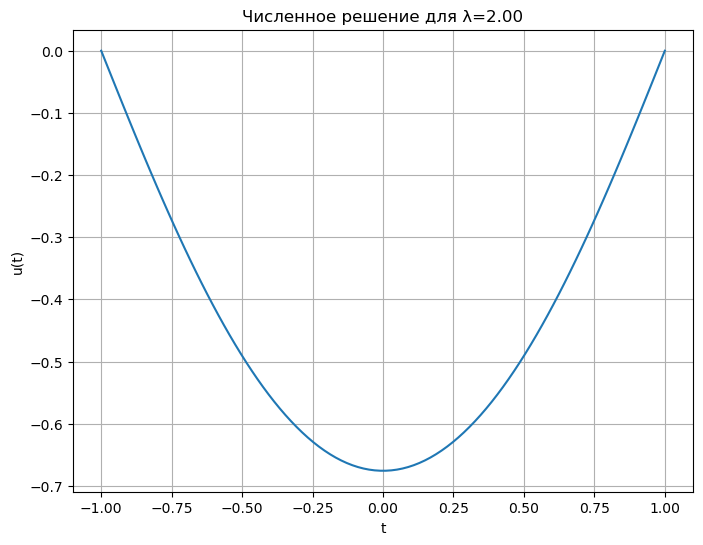

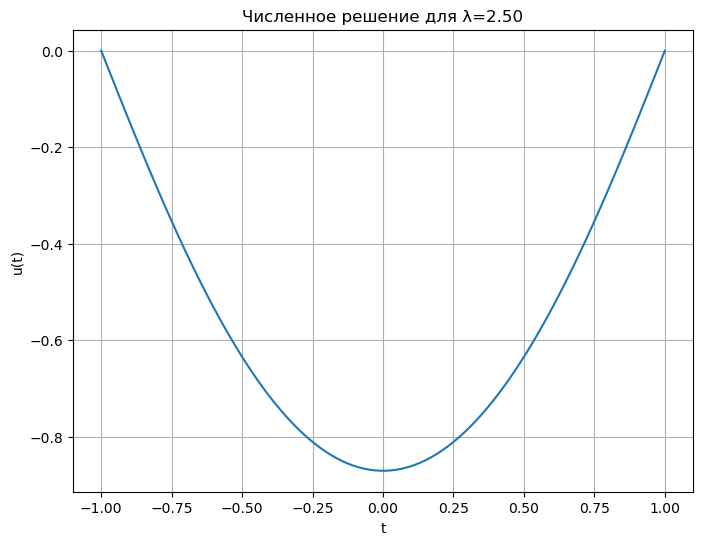

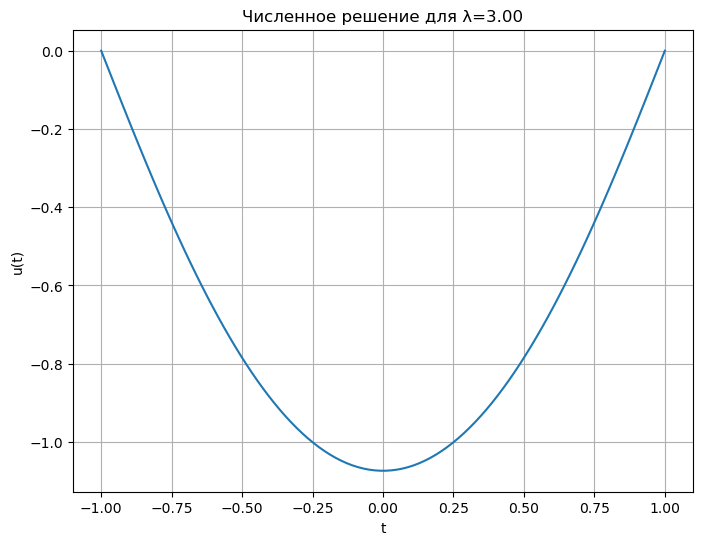

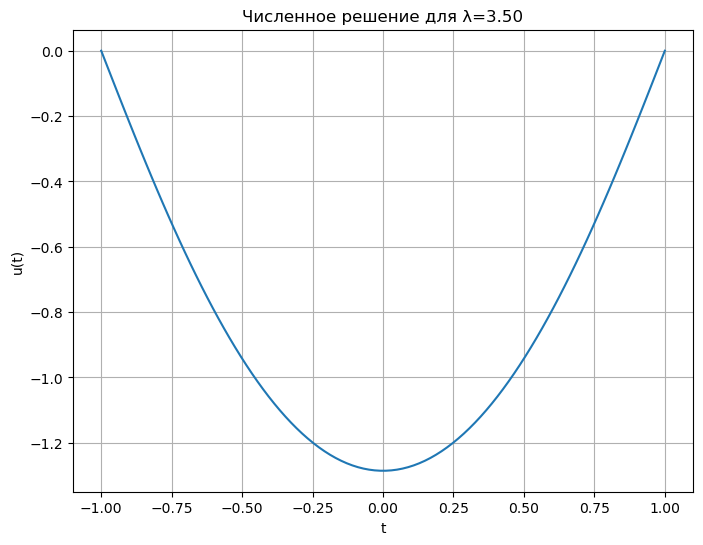

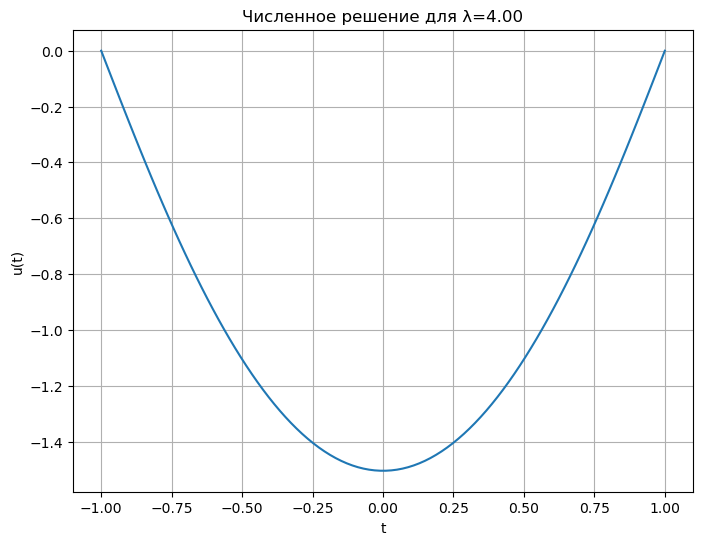

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def C_k(t, lamb):
    return lamb * t**2 - 1

def solve_nonlinear_bvp(N=100, lambda_max=4.0, delta_lambda=0.5, tol=1e-5, max_iter=100):
    a, b = -1, 1
    h = (b - a) / (N + 1)
    t = np.linspace(a, b, N + 2)
    A = 1 / h**2
    lambda_values = np.arange(0, lambda_max + delta_lambda, delta_lambda)
    
    solutions = {}

    for lambda_ in lambda_values:
        u = np.zeros(N + 2)

        for _ in range(max_iter):
            F = np.zeros(N)
            dF = np.zeros((N, N))
            
            for k in range(1, N + 1):
                C = C_k(t[k], lambda_)
                F[k - 1] = A * u[k + 1] - 2 * A * u[k] + A * u[k - 1] + C * np.exp(u[k]) + 1 - lambda_
                
                if k > 1:
                    dF[k - 1, k - 2] = A
                dF[k - 1, k - 1] = -2 * A *u[k] + C * np.exp(u[k])
                if k < N:
                    dF[k - 1, k] = A
            
            try:
                v = np.linalg.solve(dF, -F)
            except np.linalg.LinAlgError:
                print(f"Ошибка: матрица Якоби сингулярна для lambda={lambda_}")
                break

            u[1:N + 1] += v
            
            if np.linalg.norm(v, np.inf) < tol:
                print(f'Col iterations: {_}')
                break
        
        solutions[lambda_] = u.copy()
    
    return t, solutions

t, solutions = solve_nonlinear_bvp()

for lambda_, u in solutions.items():
    plt.figure(figsize=(8, 6))
    plt.plot(t, u)
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.title(f'Численное решение для λ={lambda_:.2f}')
    plt.grid()
    plt.show()